In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the encoded dataset
df = pd.read_csv('telco_encoded.csv')

# Display first few rows
df.head(10)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_encoded,Partner_encoded,Dependents_encoded,PhoneService_encoded,PaperlessBilling_encoded,Churn_encoded,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,True,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,0,0,1,1,1,...,True,False,False,True,False,False,False,False,False,True
3,0,45,42.30,1840.75,1,0,0,0,0,0,...,True,False,False,False,True,False,True,False,False,False
4,0,2,70.70,151.65,0,0,0,1,1,1,...,True,False,False,True,False,False,False,False,True,False
5,0,8,99.65,820.50,0,0,0,1,1,1,...,False,False,True,True,False,False,False,False,True,False
6,0,22,89.10,1949.40,1,0,1,1,1,0,...,True,False,False,True,False,False,False,True,False,False
7,0,10,29.75,301.90,0,0,0,0,0,0,...,True,False,False,True,False,False,False,False,False,True
8,0,28,104.80,3046.05,0,1,0,1,1,1,...,False,False,True,True,False,False,False,False,True,False
9,0,62,56.15,3487.95,1,0,1,1,0,0,...,True,False,False,False,True,False,True,False,False,False


In [5]:
# Assuming the target column is named 'Churn' (update if different)
X = df.drop('Churn_encoded', axis=1)
y = df['Churn_encoded']

# 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Train shape: {X_train.shape}, Test shape: {X_test.shape}')

Train shape: (5634, 40), Test shape: (1409, 40)


C:\Users\FATTANI COMPUTERS\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\FATTANI COMPUTERS\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\FATTANI COMPUTERS\AppDa

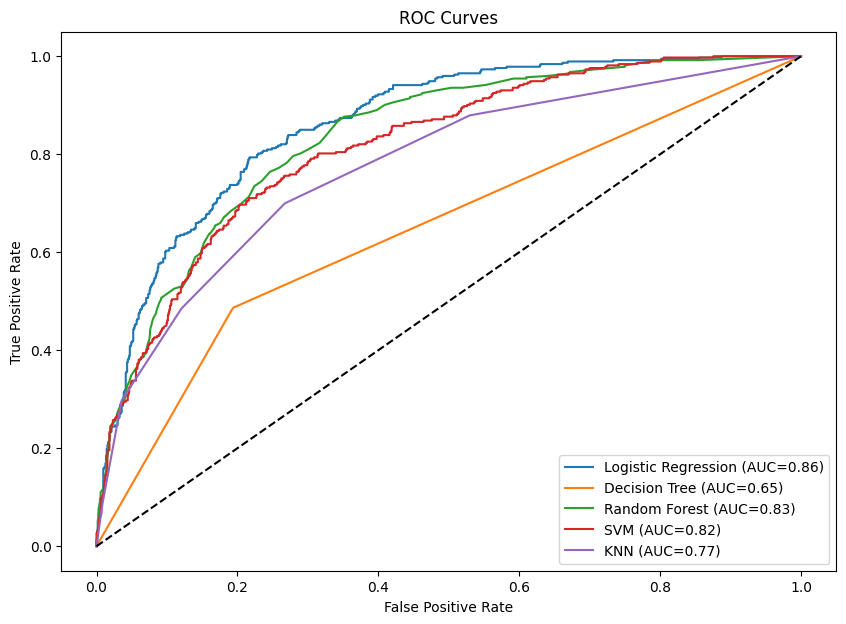

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier()
}

results = {}
plt.figure(figsize=(10, 7))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC={auc:.2f})')
    results[name] = [acc, prec, rec, f1, auc]
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC']
results_df = pd.DataFrame(results, index=metrics).T

# Display comparison table
print('Model Comparison Table:')
display(results_df)

# Select best model by AUC
best_model_name = results_df['AUC'].idxmax()
best_model_metrics = results_df.loc[best_model_name]
print(f'Best Model: {best_model_name}')
print(best_model_metrics)